In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras


In [3]:

## Load the dataset
dataframe = pd.read_csv("dataset_Facebook.csv", delimiter=',',header=None)
dataset = dataframe.values
X_train = dataset[:400,2:18]
Y_train = dataset[:400,18]
X_test = dataset[401:,2:18]
Y_test = dataset[401:,18]


In [34]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean


In [11]:
##define base model
def base_model():
     model = Sequential()
     model.add(Dense(16, input_dim=16, init='normal', activation='relu'))
     model.add(Dense(16, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

In [35]:
# scale = StandardScaler()
# X_train = scale.fit_transform(X_train)
# X_test = scale.fit_transform(X_test)
clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
clf.fit(X_test,Y_test)


/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="normal", input_dim=16)`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(99, kernel_initializer="normal", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


In [36]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(Y_test, clf.predict(X_test))
score = mean_absolute_error(Y_train, clf.predict(X_train))
score


225.46193556755782

In [37]:
scores=[]
scores2=[]
v=[]
for i in range(1,100,2):
    ##define base model
    def base_model():
        model = Sequential()
        model.add(Dense(16, input_dim=16, init='normal', activation='relu'))
        model.add(Dense(i, init='normal', activation='relu'))
        model.add(Dense(1, init='normal'))
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        return model
    seed = 7
    np.random.seed(seed)
    scale = StandardScaler()
#     X_train = scale.fit_transform(X_train)
#     X_test = scale.fit_transform(X_test)
    clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
    clf.fit(X_test,Y_test)
    from sklearn.metrics import mean_absolute_error
    score = mean_absolute_error(Y_test, clf.predict(X_test))
    scores.append(score)
    v.append(i)
    score = mean_absolute_error(Y_train, clf.predict(X_train))
    scores2.append(score)

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="normal", input_dim=16)`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="normal", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
/ho

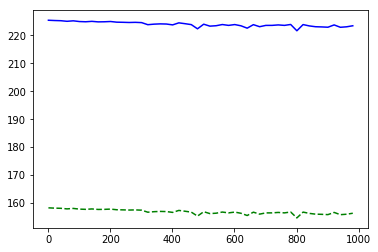

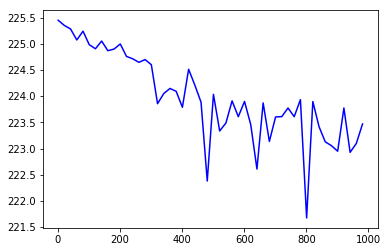

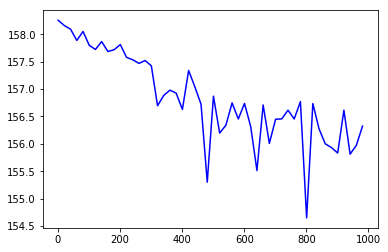

In [29]:
import matplotlib.pyplot as plt
plt.plot(v,scores,'g--')
plt.plot(v,scores2,'b')
plt.show()
plt.plot(v,scores2,'b')
plt.show()
plt.plot(v,scores,'b')
plt.show()

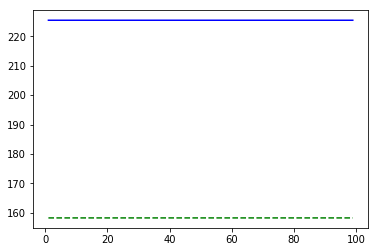

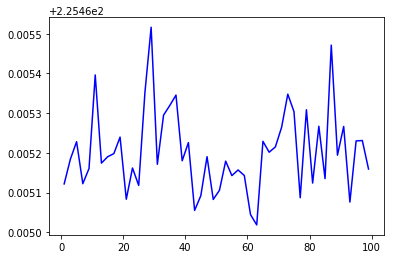

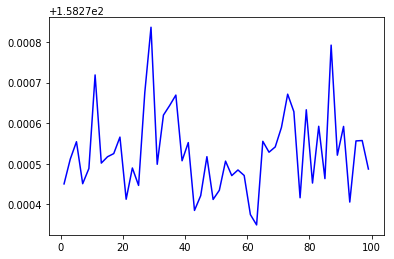

In [38]:
import matplotlib.pyplot as plt
plt.plot(v,scores,'g--')
plt.plot(v,scores2,'b')
plt.show()
plt.plot(v,scores2,'b')
plt.show()
plt.plot(v,scores,'b')
plt.show()

In [44]:
import time
import keras
from sklearn.metrics import mean_absolute_error
times = []
scores=[]
scores2=[]
v=[]
for i in range(1,30):
    def base_model():
        model = Sequential()
        model.add(Dense(16, input_dim=16, init='normal', activation='relu'))
        model.add(Dense(8, init='normal', activation='relu'))
        model.add(Dense(1, init='normal'))
        adam = keras.optimizers.Adam(lr=i/1000, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(loss='mean_squared_error', optimizer = adam)
        return model
    seed = 7
    np.random.seed(seed)
    scale = StandardScaler()
#     X_train = scale.fit_transform(X_train)
#     X_test = scale.fit_transform(X_test)
    epoch_time_start = time.time()
    clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)
    clf.fit(X_test,Y_test)
    times.append(time.time() - epoch_time_start)
    score = mean_absolute_error(Y_test, clf.predict(X_test))
    scores.append(score)
    v.append(i)
    score = mean_absolute_error(Y_train, clf.predict(X_train))
    scores2.append(score)
    scores2

/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="normal", input_dim=16)`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="normal", activation="relu")`
/home/gautham/singularity/env/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


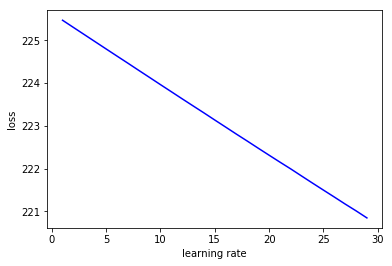

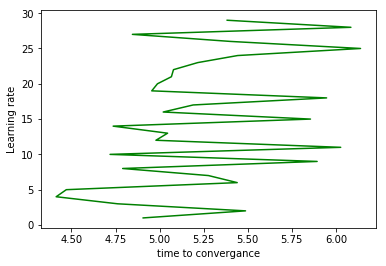

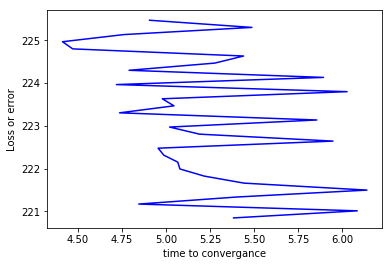

In [47]:
import matplotlib.pyplot as plt
# plt.plot(v,scores,'g')
plt.plot(v,scores2,'b')
plt.ylabel('loss')
plt.xlabel('learning rate')
plt.show()
plt.plot(times,v,'g')
plt.ylabel('Learning rate')
plt.xlabel('time to convergance')
plt.show()
# plt.plot(times,scores,'g')
plt.plot(times,scores2,'b')
plt.ylabel('Loss or error')
plt.xlabel('time to convergance')
plt.show()